In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras import backend as K
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
#load cifar10 train-test datasets
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
#define No of classes
num_classes = len(np.unique(Y_train))
num_classes

10

In [4]:
# get train dimension
X_train.shape

(50000, 32, 32, 3)

In [5]:
# get test dimension
Y_train.shape

(50000, 1)

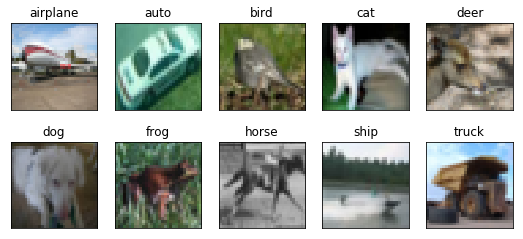

In [6]:
#show examples for each class

class_names = ['airplane','auto','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(9,4))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(Y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    ax.set_title(class_names[i])
    plt.imshow(features_idx[img_num,::])
plt.show()

In [7]:
#data pre-processing

#Converting everything to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing values between 0 and 1
X_train = X_train/255
X_test = X_test/255

X_train.shape

(50000, 32, 32, 3)

In [8]:
# convert class labels to binary class matrices (one-hot) with the Keras utility to_categorical

Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)

In [9]:
# check sample response class img is in one - hot encoding form.
# we need the target to be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the 
# the class of the sample, because afterwards we are using the categorical_crossentropy loss which requires our
# targets to be in categorical format.
Y_train[3]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [10]:

#______________________INTRODUCTION___________________________________________

#TensorFlow is a brilliant tool, with lots of power and flexibility.
#However, for quick prototyping work it can be a bit verbose.
#Keras is a higher level library which operates over either TensorFlow or Theano, 
#and is intended to stream-line the process of building deep learning networks.


#Models in Keras can come in two forms – Sequential and via the Functional API.  
#The Sequential model is a linear stack of layers.
#For most deep learning networks that we build, the Sequential model is likely what we will use.
#It allows us to easily stack sequential layers (and even recurrent layers)
#of the network in order from input to output.
#The functional API allows you to build more complicated architectures.

# setup the model

#image input dimensions
#img_rows = 32
#img_cols = 32
#img_channels = 3

#number of convulation filters to use
#filters = 32
# size of pooling area for max pooling
#pool_size = (2, 2)
# convolution kernel size
#kernel_size = (3, 3)

model = Sequential()

#The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model 
#(and only the first, because following layers can do automatic shape inference) needs to receive information about its
#input shape.
#Also, in the 1st layer,  we add a 2D convolutional layer to process the 2D CIFAR input images.
#The first argument passed to the Conv2D() layer function is the number of output 
#channels – in this case we have 32 output channels (as per the architecture shown at the beginning). 
#The next input is the kernel_size, which in this case we have chosen to be a 3×3 moving window,
#followed by the strides in the x and y directions (1, 1) which is the default, that's why we left this argument out.
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))
#Next, the activation function is a rectified linear unit
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#Next, we add a 2D max pooling layer.  The definition of the layer is dead easy. 
#We simply specify the size of the pooling in the x and y directions – (2, 2) in this case, and the strides.
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

#Next, we add another two convolutionals layers, with 64 output channels and a max pooling layer.
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

#Now that we’ve built our convolutional layers, we want to flatten the output from these to enter our fully 
#connected layers.  In TensorFlow, we had to figure out what the size of our output tensor from the convolutional 
#layers was in order to flatten it, and also to determine explicitly the size of our weight and bias variables.
#Sure, this isn’t too difficult – but Keras just makes our life easier not to have to think about it too much.
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors

#The next lines declare our fully connected layers – using the Dense() layer in Keras. Again, it is very simple. 
#First we specify the size – in line with our architecture, we specify 512 and 256 nodes, 
#each activated by a ReLU function.

#Dense(512) is a fully-connected layer with 512 hidden units
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Dense(256) is a fully-connected layer with 256 hidden units
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#The last line is our soft-max classification, or output layer, which is the size of the number of our classes
#(10 in this case, for our 10 possible objects).
model.add(Dense(num_classes, activation='softmax'))

In [11]:
# CNN structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [12]:
#compile the model

#Once our model looks good, configure its learning process with .compile()
#Before training a model, we need to configure the learning process, which is done via the compile method. 
#It receives three arguments:

#LOSS
#A loss function. This is the objective that the model will try to minimize.
#It can be the string identifier of an existing loss function or it can be an objective function. 
#In this case, we will use the standard cross entropy for categorical classification (categorical_crossentropy). 

#OPTIMIZER
#An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), 
#or an instance of the  Optimizer class. In this case, we chose Adam optimizer.
#Default parameters  / Arguments 
#lr: float >= 0. Learning rate.
#beta_1: float, 0 < beta < 1. Generally close to 1.
#beta_2: float, 0 < beta < 1. Generally close to 1.
#epsilon: float >= 0. Fuzz factor.
#decay: float >= 0. Learning rate decay over each update.  (more on the report)

#METRICS
#A list of metrics.Generally, a metric could be the string identifier of an existing metric or a custom metric function.
#Since, it is a classification problem we want to set this to metrics=['accuracy'].

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Train the model
#Keras models are trained on Numpy arrays of input data and labels. 
#For training the model, we typically use the  fit function. 
# x_train and y_train are Numpy arrays 
# And we can now iterate on our training data in batches.
# In Keras, we don’t have to explicitly handle the batching up of our data during training,
# rather we just specify the batch size and it does it for us.
# In this case we are using a batch size of 32.
# Next we pass the number of training epochs (50 in this case).
# The verbose flag, set to 1 here, specifies if you want detailed information 
# being printed in the console about the progress of the training.
# Finally, we pass the validation or test data to the fit function so Keras knows what 
# data to test the metric against when evaluate() is run on the model.
start = time.time()
fitted_model = model.fit(X_train, Y_train, 
                       batch_size=32, epochs=100,shuffle=True,  #best acc 90epochs
                       validation_data = (X_test, Y_test), 
                       verbose=1)
end = time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 522s - loss: 1.7654 - acc: 0.3264 - val_loss: 1.3390 - val_acc: 0.5130
Epoch 2/100
50000/50000 [==============================] - 502s - loss: 1.3516 - acc: 0.5108 - val_loss: 1.1805 - val_acc: 0.5761
Epoch 3/100
50000/50000 [==============================] - 503s - loss: 1.1714 - acc: 0.5850 - val_loss: 0.9927 - val_acc: 0.6489
Epoch 4/100
50000/50000 [==============================] - 507s - loss: 1.0649 - acc: 0.6260 - val_loss: 0.9945 - val_acc: 0.6562
Epoch 5/100
50000/50000 [==============================] - 503s - loss: 0.9981 - acc: 0.6542 - val_loss: 0.8994 - val_acc: 0.6882
Epoch 6/100
50000/50000 [==============================] - 504s - loss: 0.9486 - acc: 0.6742 - val_loss: 0.8202 - val_acc: 0.7151
Epoch 7/100
50000/50000 [==============================] - 506s - loss: 0.9104 - acc: 0.6862 - val_loss: 0.8710 - val_acc: 0.6975
Epoch 8/100
50000/50000 [===============

In [14]:
# performance plots

def plot_performance(model):
    fig, axs = plt.subplots(1,2,figsize=(13,4))
    
    # Accuracy
    axs[0].plot(range(1,len(model.history['acc'])+1),model.history['acc'])
    axs[0].plot(range(1,len(model.history['val_acc'])+1),model.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model.history['acc'])+1),len(model.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Loss
    axs[1].plot(range(1,len(model.history['loss'])+1),model.history['loss'])
    axs[1].plot(range(1,len(model.history['val_loss'])+1),model.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model.history['loss'])+1),len(model.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

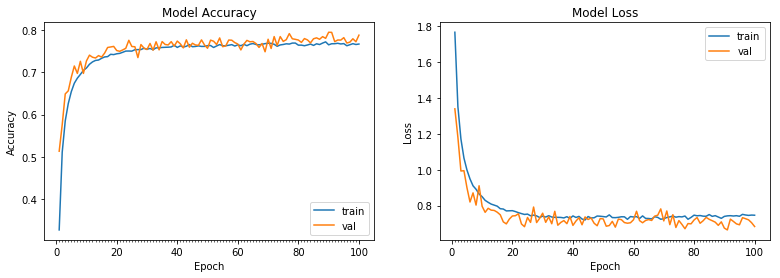

training time 50679.07 seconds


In [15]:
# plot model history
plot_performance(fitted_model)
print("training time %0.2f seconds"%(end - start))

In [16]:
# calculating accuracy
def accuracy(X_test, Y_test, model):
    result = model.predict(X_test)
    pred_class = np.argmax(result, axis=1)
    true_class = np.argmax(Y_test, axis=1)
    num_correct = np.sum(pred_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100) 

In [17]:
# compute test accuracy
print ("Test data Accuracy: %0.2f"%accuracy(X_test, Y_test, model))

Test data Accuracy: 78.82


In [18]:
# confusion matrix
def plot_confusion_matrix(predicted_classes):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the confusion matrix using sklearn.
    result = model.predict(X_test)
    cm = confusion_matrix(y_true=np.argmax(Y_test, axis=1),  # True class for test-set.
                          y_pred=np.argmax(result, axis=1))  # Predicted class.

    # Print the confusion matrix as text.
    for i in range(num_classes):
        # Append the class-name to each line.
        class_name = "({}) {}".format(i, class_names[i])
        print(cm[i, :], class_name)

    # Print the class-numbers for easy reference.
    class_numbers = [" ({0})".format(i) for i in range(num_classes)]
    print("".join(class_numbers))

In [19]:
#predictions
result = model.predict(X_test)
#classifying to classes by taking the class with the highest prob 
y_pred=np.argmax(result, axis=1)

In [20]:
print("Confusion Matrix:")
plot_confusion_matrix(y_pred)

Confusion Matrix:
[836   5  14  36  10   1   3  10  60  25] (0) airplane
[ 13 867   1  14   1   1   9   1  25  68] (1) auto
[ 75   0 597  88  95  39  67  23   8   8] (2) bird
[ 27   0  26 659  49 133  63  20  13  10] (3) cat
[ 12   0  28  71 788  22  39  31   7   2] (4) deer
[  4   1  25 185  34 701  12  30   3   5] (5) dog
[  6   1  21  64  35  12 851   2   8   0] (6) frog
[ 12   1  15  63  43  50   3 806   4   3] (7) horse
[ 47  10   7  17   3   1   1   0 894  20] (8) ship
[ 19  35   2  24   3   0   5   3  26 883] (9) truck
 (0) (1) (2) (3) (4) (5) (6) (7) (8) (9)


In [32]:
from sklearn.manifold import TSNE

#load cifar10 train-test datasets
(X_train, Y_train), (X_test, Y_test2) = cifar10.load_data()

In [30]:
start = time.time()

# should do more iterations, but let's do the minimum due to time constraints
n_iter = 400
tsne = TSNE(n_components=2,random_state=0,n_iter=n_iter)
feats_2d = tsne.fit_transform(result)
end = time.time()
print ("t-SNE time %0.2f seconds"%(end - start))

674.2045776844025


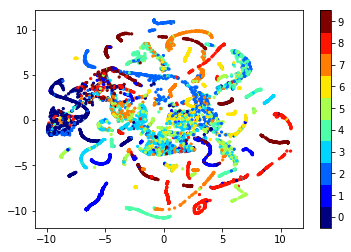

In [33]:
plt.scatter(feats_2d[:,0],feats_2d[:,1],c=Y_test2,cmap=plt.cm.get_cmap("jet", 10),s=5) # 10 because of the number of classes
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [21]:
# Adding Data Augmentation
# This will do preprocessing and realtime data augmentation:
train_gen = ImageDataGenerator(featurewise_center=True,  # set input mean to 0 over the dataset
                               featurewise_std_normalization=True, # divide inputs by std of the dataset
                               vertical_flip=True, # randomly flip images
                               width_shift_range=0.2, # randomly shift images horizontally (fraction of total width)
                               height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
                               rotation_range=40,  # randomly rotate images in the range (degrees, 0 to 180)
                               zoom_range=0.2, 
                               zca_whitening=True, # apply ZCA whitening
                               fill_mode='nearest')

test_gen = ImageDataGenerator()

In [24]:
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
train_gen.fit(X_train)

train_generator = train_gen.flow(X_train, Y_train, batch_size=32)
test_generator = test_gen.flow(X_test, Y_test, batch_size=32)

In [26]:
# !!! WE INTERRUPTED THE TRAINING PROCEDURE OF THE AUGMENTED MODEL BECAUSE IT WAS TAKING TOO LONG !!!

# train the model
start = time.time()

fitted_model_2 = model.fit_generator(train_generator, epochs=100, steps_per_epoch=len(X_train), 
                   validation_data=test_generator, validation_steps=len(X_test), verbose=1)
end = time.time()

print ("Training time %0.2f seconds"%(end - start))

Epoch 1/100
50000/50000 [==============================] - 21263s - loss: 2.3033 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 21509s - loss: 2.3032 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 19872s - loss: 2.3031 - acc: 0.0982 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 21943s - loss: 2.3031 - acc: 0.0981 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 5/100
39916/50000 [======================>.......] - ETA: 4250s - loss: 2.3073 - acc: 0.0981

KeyboardInterrupt: 

In [ ]:
# plot model history
plot_performance(fitted_model_2)

In [ ]:
# compute test accuracy
print ("Test data Accuracy: %0.2f"%accuracy(X_test, Y_test, model))

In [ ]:
# 'h enallaktika ---- poio na krathsoume?
score=model.evaluate(X_test, Y_test, batch_size=32)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

In [ ]:
#save weights
model.save_weights('cnn_32x3_epoch_100_visualize.h5')